## HOMEWORK 1 - SUPRIO DUBEY(2013036)

#### Question 1.<br><br> Consider the coin tossing example, discussed in the first lecture. Simulate1000 tosses of the coins, setting H = 0.3. Consider a uniform prior and update the posterior at each toss. Plot the resulting posterior after 1, 50,100, 300, 700, 1000 tosses. Repeat the simulated experiment by setting a Gaussian prior centered in H = 0.5, with standard deviation = 0.1. Do both posteriors converge a similar distribution in the end? What does that mean? Which posterior converges faster and why?

#### Simulation Answer 1.

In [132]:

import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)

Lets start by simulating a coin toss. We define a function tosses with two parameters the number of tosses and the probability of getting a head.

In [133]:
def toss(head_prob: float, N: int = 1) -> int:
    random_samples = np.random.uniform(low=0., high=1., size= N)
    
    return(np.sum(random_samples < head_prob))
    """
    N = number of tosses
    Here we are simulating a coin toss returning the total number of heads
    """

tosses(0.3,100)

34

Now we want to find the distribution of our coin toss for N tosses in which each coin flip is independent.The distribution is given by a Bionamial distribution: 

\begin{equation}
    P(data|H,I) = H^{R}(1-H)^{(N-R)} \label{1.1}
\end{equation}
where,  
- H = probability of getting heads
- R = heads in N tosses
- N =  Total no. of tosses
<br>$P(data|H,I)$ is our likelihood which is the probability of observing a given set of data for a given set of parameters.So, in our case it is H.<br>

So, let us define a function below.

In [134]:
def binomial_distribution(head_prob: np.array,R: int,N: int):
    
    # Considered log-likelihood and then returned the likelihood.
    
    f = (R * np.log(head_prob) + (N - R) * np.log(1 - head_prob))
    
    return (np.exp(f))


In our task we have to simulate the experiment for two different priors 
- Uniform Prior: $P(H|I ) = 1$ if 0 < H <1 else 0
- Gaussian Prior : $P(H|I ) = exp (\frac{-(H -\mu)}{\sigma^{2}})$

In [135]:
# defining Gaussisan distribution for gaussian prior

def gaussian_distribution(heads_prob: np.array,mean_h: float,std_dev: float):
    f = np.exp(- (heads_prob - mean_h)**2 / 2 / std_dev**2)
    return (f)

Now let us perform the simultaion for the experiment.

In [177]:
def experiment(num_tosses: np.array, H = 0.3, N = 1000, head_mean = 0.5,std_dev = 0.1):
    np.random.seed(42)


    h_data = np.linspace(0 + 0.1, 1 - 0.1,N) #contains values of head probability

    fig,axs =plt.subplots(2,3,figsize=(20,10))

    fig.suptitle('Effect of Normal and Gaussian prior')

    l=0
    j=0

    for i in (num_tosses):


        heads = np.cumsum(toss(H,i))


    ##uniform prior##

        likelihood = binomial_distribution(h_data,heads,i)
        likelihood /= np.max(likelihood)
        normal_posterior = np.copy(likelihood)

    ### gaussian prior###
#         head_mean = 0.5
#         std_dev =0.1
        gaussian_posterior = gaussian_distribution(h_data,head_mean,std_dev)*likelihood
        gaussian_posterior /= np.max(gaussian_posterior)




    ###plot##
        if j>2:
            l+=1
            j=0

        axs[l][j].plot(h_data, likelihood, label='Uniform prior')
        axs[l][j].plot(h_data, gaussian_posterior,label='Gaussian prior')
    #     axs[l][j].plot(h_data, biased_posterior,label='Biased prior')
        axs[l][j].axvline(H,color = 'black')
        axs[l][j].set_xlim(0, 1)
        axs[l][j].set_xlabel('Heads probability')
        axs[l][j].set_ylabel('Posterior Probability Distribution')
        axs[l][j].legend(["Uniform prior","Gaussian prior","Biased Prior","Heads Probability"])
        axs[l][j].title.set_text(''+str(i)+' Tosses')
        axs[l][j].grid(True)
        j+=1
    plt.show()    
  





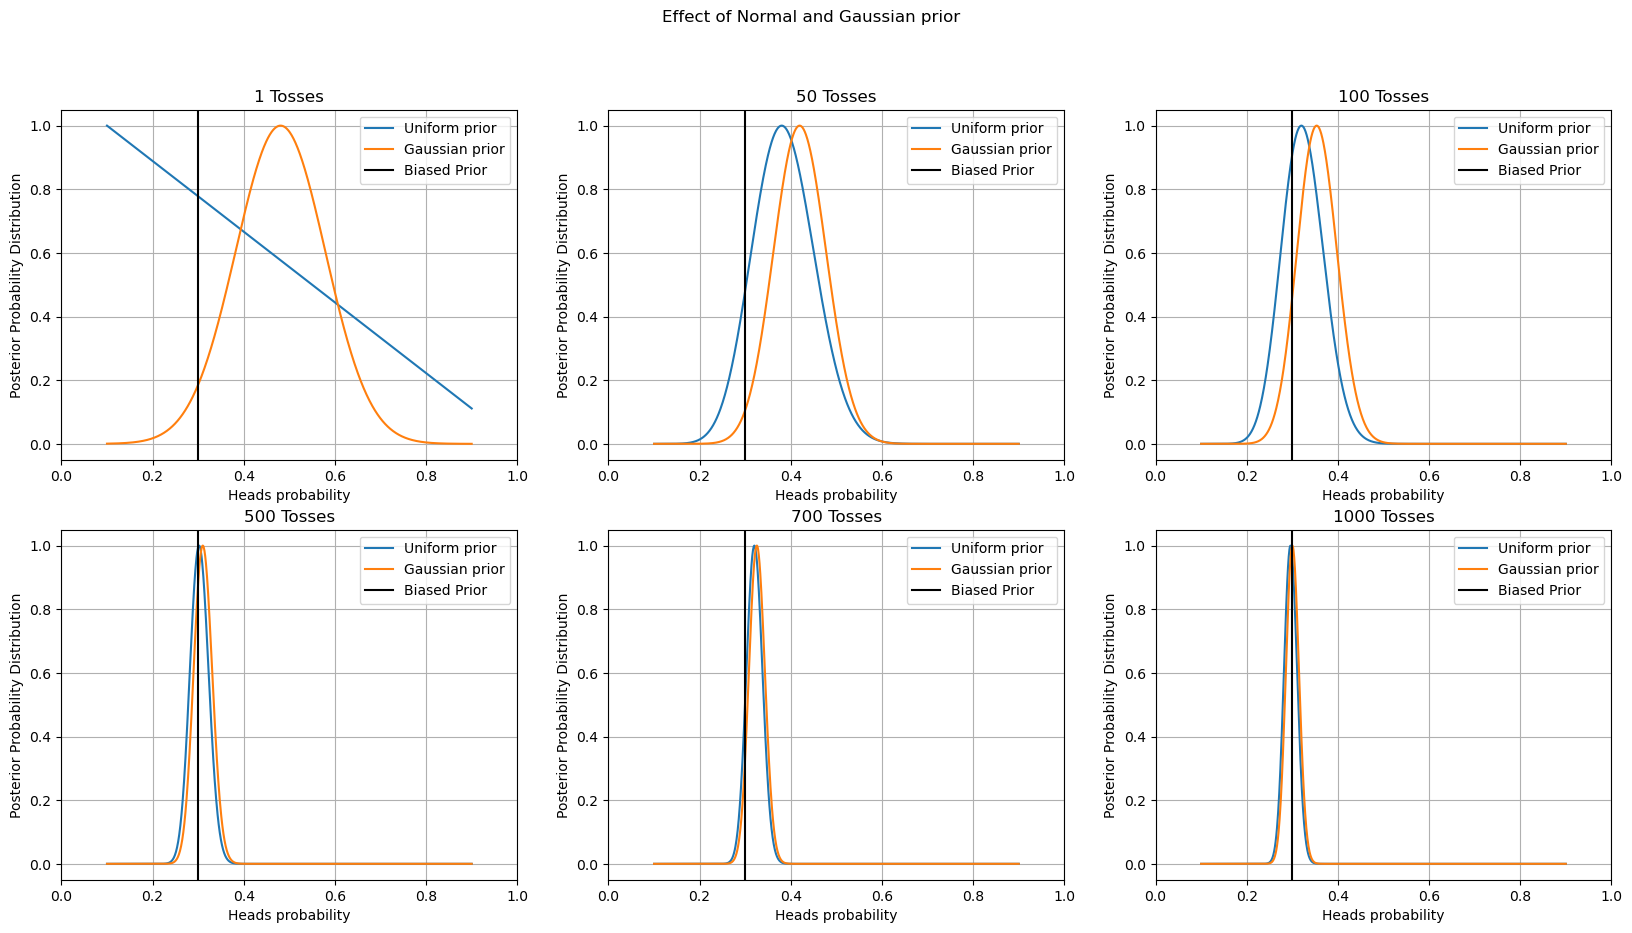

In [167]:
H = 0.3 #
N = 1000 # for simulating 1000 tosses of coin
num_tosses = [1,50,100,500,700,1000] # different number of tosses for plotting th posterior
exp1 = experiment(num_tosses,H,N)
exp1


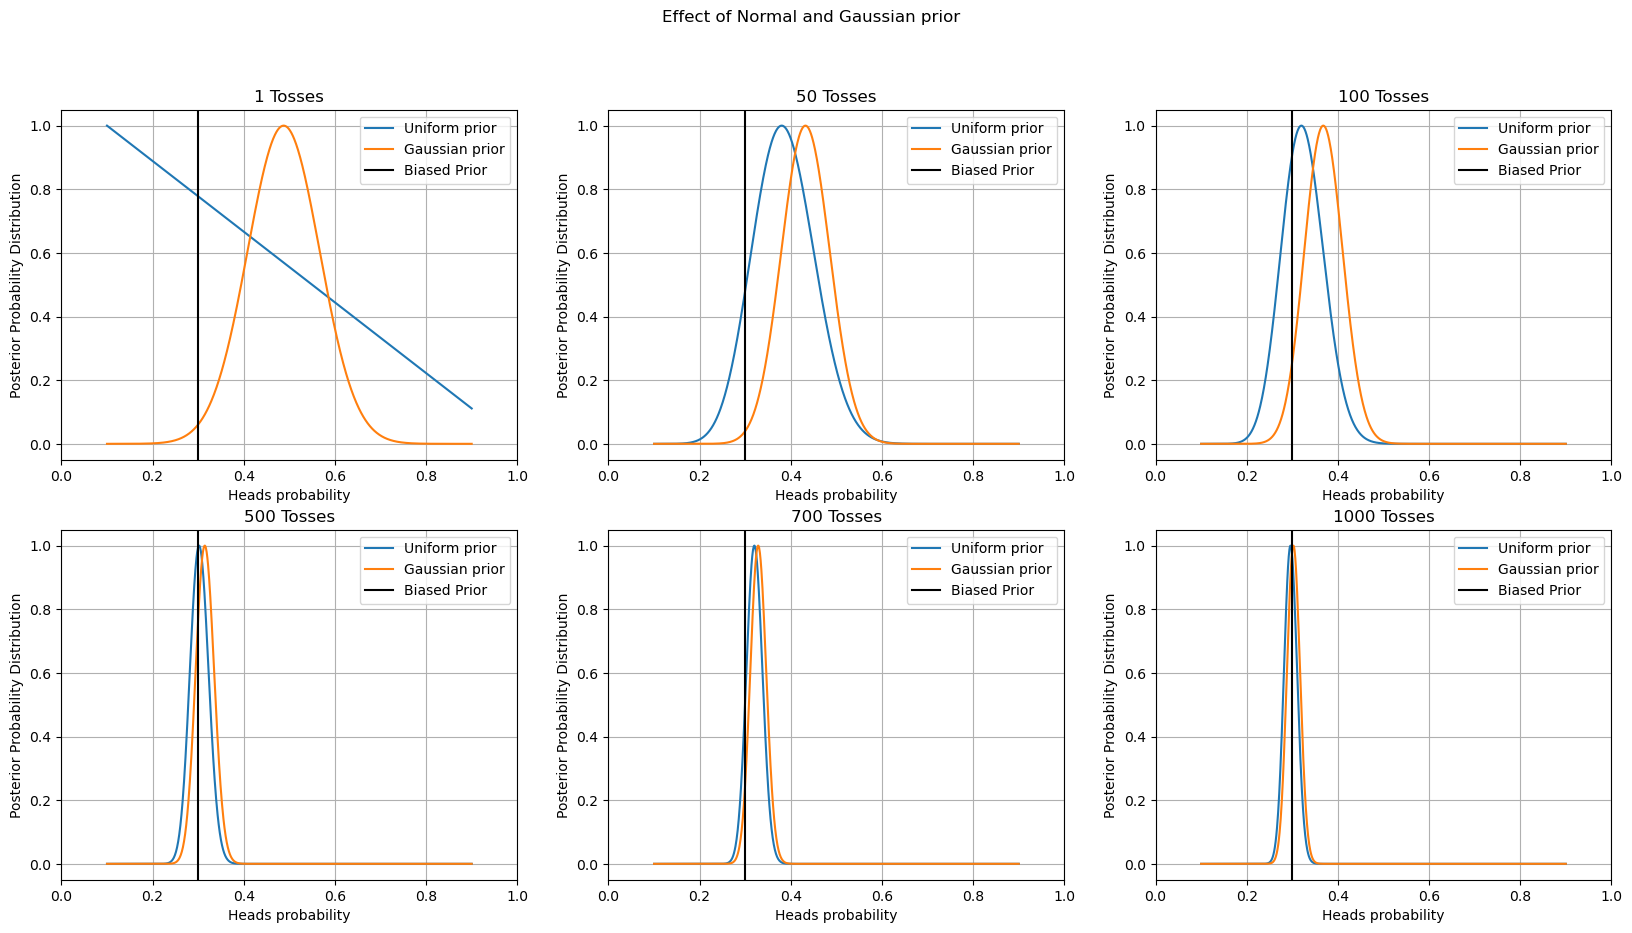

In [182]:
exp2 = experiment(num_tosses,head_mean=0.5,std_dev=0.08)
exp2

#### Answer 1. <br><br>
From the above plots we can see that for both i.e the Uniform Prior and the Gaussian Prior centered at H = 0.5, with standard deviation σ = 0.1,the posteriors for them converges to a similar distribution in the end as we increase the number of data sample. So the relevance of the prior is decreasing as we are increaisng our data sample.
We also observe that the uniform prior converges faster than the Gaussian prior as it is less informative whereas the gaussian prior centered at 0.5 is more-biased towards our belief of the coin being fair. However, if the Gaussian prior is centered around the true value it converges quicker than the uniform prior. 

#### Question 2.<br><br> Politician A makes a statement about some issue you knew nothing about before. Let’s call such proposition $S$ and assume your starting prior on $S$ is uniform with 0.5 probability of $S$ being either true or false. Update your probability of $S$ being true, knowing that you trust Mr. A to tell the truth with probability $prob(A_{T} ) = 4/5$. At this point Mr B - another politician - declares that he agrees with Mr A on $S$ being true. You trust Mr. B much less, and believe that the probability of him to lie is $prob(B_{T} ) = 3/4$. What is your final degree of belief in proposition $S$?

#### Answer 2:<br><br>
Let us first summarise the information given in the question.
- $P(S) = 0.5$ is the probability of S being True our starting prior.
- $P(A_{T}|S) = 4/5$ is the probability that Mr A is telling the truth which is the likelihood.
- $P(A_{T}|\overline{S}) = 1/5$ is the probability of Mr A telling lie.
- $P(B_{T}|\overline{S}) = 3/4$ is the probability of Mr B telling lie.
- $P(B_{T}|S) = 1/4$ is the probability that Mr B is telling the truth
Let us find our degree of belief that the statement given by politician A with issues we new nothing about by using Bayes Theorem<br>
The posterior probability that the the statement is true as it is conveyed by Mr A is

<br>$P(S|A_{T}) = \frac{P(A_{T}|S)  P(S)}{P(A_{T})}$ - eq (2.1),<br>

Now,it is given that politician B agrees on Mr A's True statement so using the Bayes Theorem yet again, let us see our degree of belief in the propostion that statement is true.<br>

$P(S|B_{T},A_{T}) = \frac{P(B_{T}|A_{T},S) P(A_{T}|S) P(S)}{P(B_{T},A_{T})}$ - eq(2.2)<br>
<br>We can write $P(B_{T},A_{T}) = P(B_{T}) P(A_{T})$ as they are independent variables and subsittute it in - eq. (2.2) and hence we can write eq. (2.2) using eq (2.1) as <br>

$P(S|B_{T},A_{T}) = \frac{P(B_{T}|A_{T},S) P(A_{T}|S) P(S)}{P(B_{T},A_{T})} =  \frac{P(B_{T}|A_{T},S) P(S|A_{T})}{P(B_{T})}$ - eq. (2.3) <br>

Now, let us write the evidence $P(B_T)$

<br>$P(S|B_{T}) = P(B_{T}|S') P(S') + P(B_{T}|\overline{S'}) P(\overline{S'})$ - eq (2.4),<br><br> where $P(S')$ is our updated prior i.e the posterior probabilty in eq.(2.1)because we update our beliefs as we get new evidence.

We can substitute the all values in eq. (2.3) and finf the final proposition as done in the code below.


In [15]:
# Initial probabilities
P_S = 0.5
P_not_S = 0.5

# Mr. A 
P_A_T_given_S = 4/5 # likelihood
P_A_T_given_not_S = 1/5 
P_A_T = P_A_T_given_S * P_S + P_A_T_given_not_S * P_not_S # evidence

# posterior
P_S_given_A_T = (P_A_T_given_S * P_S) / P_A_T
print(f"Initial belief in proppositon S : {P_S_given_A_T:.2f}")
# Mr. B
P_B_T_given_S = 1/4 # likelihood 2nd case
P_B_T_given_not_S = 3/4
P_B_T = P_B_T_given_S * P_S_given_A_T + P_B_T_given_not_S * (1- P_S_given_A_T) # evidence 

# Updated Posterior
P_S_given_B_T = (P_B_T_given_S * P_S_given_A_T) / P_B_T

# Final degree of belief in proposition S


print(f"Final degree of belief in proposition S: {P_S_given_B_T:.2f}")


Initial belief in proppositon S : 0.80
Final degree of belief in proposition S: 0.57


#### Question 3. <br><br>You are tested for a dangerous disease named ”Bacillum Bayesianum” (BB). You test positive to BB. You know that the general incidence of BB in the population is 1%. Moreover, you know that your test has a false negative probability of 5% (false negative: you have BB but the test scores negative), and a false positive rate also of 5% (false positive: you do not have BB, but the test scores positive). What is the probability that you have actually contracted BB?

#### Answer 3.<br>
As per the information given in the question let us denote

- $P(D) = 0.01$ is the prior probability of having BB disease.
- $P(T∣\overline{D}) = 0.05$ is the probability of testing positive given that I don't have the disease.
- $P(\overline{T}∣D) = 0.05$ is the probability of testing negatve given that wI have the disease
- $P(T|D) = 0.95$ is the probability of testing positive given that I have the disease which will be the likelihood in our case.

So to find the probability that we have actually contracted BB we will use Bayes Theorem.<br><br>

$P(D|T)= \frac{P(T|D)P(D)}{P(T)}$ - Eq (3.1)<br><br>
We can write the evidence as <br><br>
$P(T) = P(T∣\overline{D})P(\overline{D}) +  P(T|D)P(D)$ - Eq. (3.2)<br><br> which we can substiture in Eq.(3.1)
and calculate our posterior which is the probability that I have actually contracted BB as done below.






In [23]:
def posterior(prob_disease, prob_positive_given_disease, prob_negative_given_no_disease, prob_positive_given_no_disease):
    # Calculate evidence: P(T)
    evidence = (prob_positive_given_no_disease * (1 - prob_disease)) + (prob_positive_given_disease * prob_disease)

    # Calculate posterior: P(D|T)
    posterior = (prob_positive_given_disease * prob_disease) / evidence

    return posterior

# Given probabilities
prob_disease = 0.01  # Prior probability of having BB disease
prob_positive_given_disease = 0.95  # Probability of testing positive given the disease
prob_negative_given_no_disease = 0.95  # Probability of testing negative given no disease
prob_positive_given_no_disease = 0.05  # Probability of testing positive given no disease

# Calculate posterior probability
posterior_probability = posterior(prob_disease, prob_positive_given_disease, prob_negative_given_no_disease, prob_positive_given_no_disease)

print(f"The probability of actually having BB disease given a positive test result is: {posterior_probability:.2f}")

The probability of actually having BB disease given a positive test result is: 0.16
